In [1]:
import librosa

In [3]:
import numpy as np
from glob import glob

In [4]:
audio, sfreq = librosa.load('UrbanSound8K/audio/fold1/7061-6-0-0.wav')
time= np.arange(0, len(audio))/ sfreq
time

array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
       2.24988662e+00, 2.24993197e+00, 2.24997732e+00])

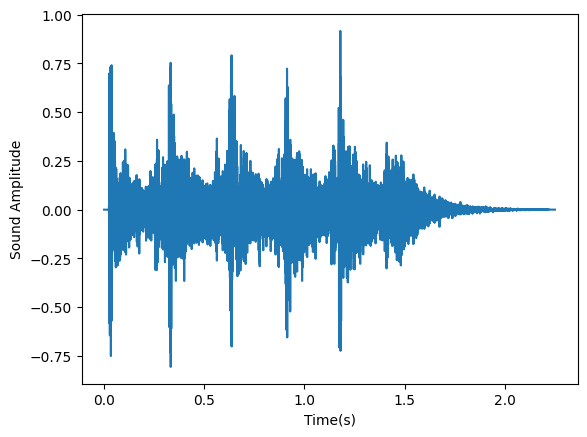

In [5]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time(s)', ylabel='Sound Amplitude')
plt.show()

In [6]:
import IPython.display as ipd
ipd.Audio('UrbanSound8K/audio/fold1/7061-6-0-0.wav')

In [7]:
import pandas as pd

In [8]:
metadata= pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [9]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [10]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read('UrbanSound8K/audio/fold1/7061-6-0-0.wav')
wave_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 1],
       [0, 0]], dtype=int16)

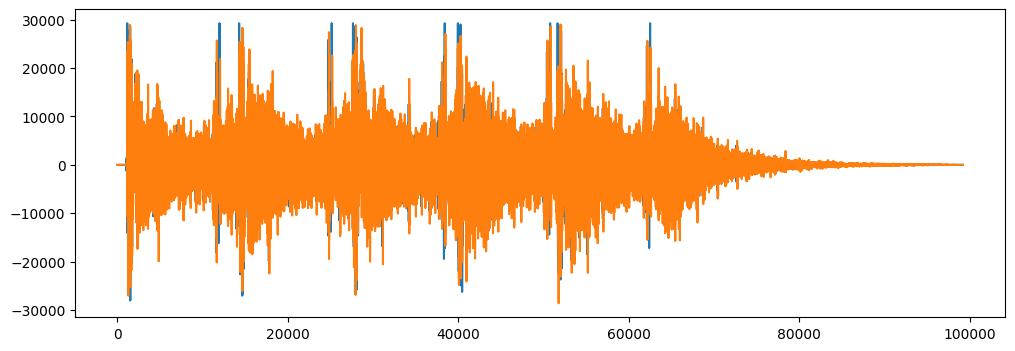

In [11]:
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

In [12]:
mfccs= librosa.feature.mfcc(y=audio, sr= sfreq, n_mfcc=40)
print(mfccs.shape)

(40, 97)


In [13]:
mfccs

array([[-1.2721312e+02,  8.0479240e+00,  1.6004412e+01, ...,
        -5.6935333e+02, -5.9172754e+02, -6.1065784e+02],
       [ 3.0020668e+01,  2.2940346e+01,  1.0669682e+01, ...,
         4.3051193e+01,  2.5888042e+01,  1.2829786e+01],
       [-2.5360167e+00, -1.1252435e+01, -1.4259802e+01, ...,
        -1.1103722e+01, -7.5506272e+00,  2.0151618e-01],
       ...,
       [ 3.2335871e-01, -3.5481029e+00, -5.0293422e+00, ...,
         2.4095786e+00,  3.1699724e+00, -2.1270427e-01],
       [-9.7800579e+00, -9.0905123e+00, -6.1912651e+00, ...,
        -5.0198019e-02,  7.2895038e-01, -9.0055245e-01],
       [ 1.6566070e+00,  1.8223327e+00,  2.8306205e+00, ...,
        -2.0609212e+00, -2.2312646e+00, -1.7745861e+00]], dtype=float32)

In [14]:
import os

In [15]:
def features_extractor(file_name):
    aud, sample_rate= librosa.load(file_name, res_type= 'kaiser_fast')
    mfccs_features= librosa.feature.mfcc(y=aud, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

In [23]:
from tqdm import tqdm
extracted_features=[]
for index_num, row in tqdm(metadata.iterrows()):
    file_name= os.path.join(os.path.abspath('A:/UrbanSound8K/audio/'), 'fold'+str(row["fold"])+'/', str(row["slice_file_name"])) 
    final_class_labels= row["class"]
    data= features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

3555it [06:49, 14.65it/s]C:\Users\Abhishek Pathak\AppData\Roaming\Python\Python39\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [12:32, 16.64it/s]C:\Users\Abhishek Pathak\AppData\Roaming\Python\Python39\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8328it [12:32, 21.40it/s]C:\Users\Abhishek Pathak\AppData\Roaming\Python\Python39\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [13:01, 11.17it/s]


In [27]:
extracted_features_df= pd.DataFrame(extracted_features, columns= ['feature', 'class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [28]:
x=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())


In [29]:
x.shape

(8732, 40)

In [30]:
#y= np.array(pd.get_dummies(y))
#y.shape

In [31]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
y.shape

(8732, 10)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)

# Model Creation


In [33]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [35]:
num_labels= y.shape[1]

In [36]:
model= Sequential()
model.add(Dense(100, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [38]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=100
num_batch_size= 32
checkpointer= ModelCheckpoint(filepath= 'saved_models/audio_classification.hdf5', verbose=1, save_best_only=True)
start= datetime.now()
model.fit(x_train, y_train, batch_size= num_batch_size, epochs= num_epochs, validation_data=(x_test, y_test), callbacks= [checkpointer])
duration= datetime.now()-start
print("Training Completed in time: ", duration)

Epoch 1/100
215/219 [============================>.] - ETA: 0s - loss: 10.9553 - accuracy: 0.1157
Epoch 1: val_loss improved from inf to 2.28697, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 3s 8ms/step - loss: 10.8325 - accuracy: 0.1167 - val_loss: 2.2870 - val_accuracy: 0.1151
Epoch 2/100
217/219 [============================>.] - ETA: 0s - loss: 2.5388 - accuracy: 0.1224
Epoch 2: val_loss improved from 2.28697 to 2.27278, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.5377 - accuracy: 0.1224 - val_loss: 2.2728 - val_accuracy: 0.1231
Epoch 3/100
207/219 [===========================>..] - ETA: 0s - loss: 2.3181 - accuracy: 0.1377
Epoch 3: val_loss improved from 2.27278 to 2.22273, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.3173 - accuracy: 0.1373 - val_loss: 2.2227 - val_accuracy: 0.17

Epoch 26/100
209/219 [===========================>..] - ETA: 0s - loss: 1.4304 - accuracy: 0.5031
Epoch 26: val_loss did not improve from 1.18308
219/219 [==============================] - 1s 4ms/step - loss: 1.4295 - accuracy: 0.5025 - val_loss: 1.1836 - val_accuracy: 0.6090
Epoch 27/100
210/219 [===========================>..] - ETA: 0s - loss: 1.4164 - accuracy: 0.5103
Epoch 27: val_loss improved from 1.18308 to 1.16420, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.4095 - accuracy: 0.5128 - val_loss: 1.1642 - val_accuracy: 0.6297
Epoch 28/100
216/219 [============================>.] - ETA: 0s - loss: 1.3806 - accuracy: 0.5334
Epoch 28: val_loss improved from 1.16420 to 1.14810, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.3789 - accuracy: 0.5339 - val_loss: 1.1481 - val_accuracy: 0.6359
Epoch 29/100
205/219 [===========================

219/219 [==============================] - 1s 4ms/step - loss: 1.1290 - accuracy: 0.6175 - val_loss: 0.9125 - val_accuracy: 0.6978
Epoch 52/100
207/219 [===========================>..] - ETA: 0s - loss: 1.1369 - accuracy: 0.6140
Epoch 52: val_loss did not improve from 0.90471
219/219 [==============================] - 1s 4ms/step - loss: 1.1387 - accuracy: 0.6139 - val_loss: 0.9353 - val_accuracy: 0.7018
Epoch 53/100
210/219 [===========================>..] - ETA: 0s - loss: 1.1351 - accuracy: 0.6064
Epoch 53: val_loss did not improve from 0.90471
219/219 [==============================] - 1s 4ms/step - loss: 1.1387 - accuracy: 0.6053 - val_loss: 0.9188 - val_accuracy: 0.6961
Epoch 54/100
213/219 [============================>.] - ETA: 0s - loss: 1.1167 - accuracy: 0.6188
Epoch 54: val_loss improved from 0.90471 to 0.90386, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.1156 - accuracy: 0.6199 - val_loss: 0.9039 -

Epoch 79/100
218/219 [============================>.] - ETA: 0s - loss: 1.0444 - accuracy: 0.6521
Epoch 79: val_loss did not improve from 0.80545
219/219 [==============================] - 1s 5ms/step - loss: 1.0447 - accuracy: 0.6523 - val_loss: 0.8162 - val_accuracy: 0.7464
Epoch 80/100
205/219 [===========================>..] - ETA: 0s - loss: 1.0327 - accuracy: 0.6532
Epoch 80: val_loss did not improve from 0.80545
219/219 [==============================] - 1s 4ms/step - loss: 1.0341 - accuracy: 0.6530 - val_loss: 0.8336 - val_accuracy: 0.7396
Epoch 81/100
219/219 [==============================] - ETA: 0s - loss: 1.0132 - accuracy: 0.6555
Epoch 81: val_loss improved from 0.80545 to 0.79406, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.0132 - accuracy: 0.6555 - val_loss: 0.7941 - val_accuracy: 0.7516
Epoch 82/100
206/219 [===========================>..] - ETA: 0s - loss: 1.0288 - accuracy: 0.6446
Epoch 82: v

In [40]:
test_accuracy= model.evaluate(x_test, y_test, verbose=0) 
print(test_accuracy[0])

0.7968736290931702


In [41]:
filename= "A:/UrbanSound8K/audio/fold3/9223-2-0-5.wav"
prediction_feature= features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
#model.predict_classes(prediction_feature)
predictions = np.argmax(model.predict(prediction_feature),axis=1)
predictions

1/1 [==============================] - 0s 96ms/step


array([2], dtype=int64)

In [42]:
prediction_feature=prediction_feature.reshape(1,-1)

In [43]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [44]:
#model.predict_classes(x_test)
#np.argmax(model.predict(x_test),axis=1)

In [2]:
filename="UrbanSound8K/audio/fold10/28808-1-0-11.wav"
aud, sample_rate= librosa.load(filename, res_type= 'kaiser_fast')
mfccs_features= librosa.feature.mfcc(y=aud, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
#print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#print(mfccs_scaled_features)
#print(mfccs_scaled_features.shape)
#predicted_label= model.predict_classes(mfccs_scaled_features)
predicted_label= np.argmax(model.predict(mfccs_scaled_features),axis=1)
print(predicted_label)
prediction_class= labelencoder.inverse_transform(predicted_label)
print(prediction_class)

NameError: name 'np' is not defined

In [46]:
ipd.Audio("UrbanSound8K/audio/fold10/28808-1-0-11.wav")
#ipd.Audio(audio_files[])